# Task 3: Optimization and new Baseline Model

After the feedback we got from Task 2, we did a little bit of reworking to optimize our linear regression Model, before we 
tackle Task 3.

Some of our Optimization includes:

    -Removed temp and kept atemp during feature selection, as using both would create issues with multicorrelation.
    -remove the 'casual' and 'registered' labels, because we only use 'cnt'
    -checked out how 'mnth' is distributed ? (Anectode from the lecture)
    -kept 'instant', because its relevant apparently
    
Since we changed our dataset, we also tested our Models again to compare if the Model improved.

<div style="width:100%;height:30px;background-color:#E31134"></div>
    

## 0. Importing Requirements

In [1]:
# importing libraries
import pandas as pd
from sklearn import linear_model
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer

## 1. Baseline linear regression model

In [2]:
# Loading the train and test data
train_df = pd.read_csv('new_traindata.csv', delimiter=',')
test_df = pd.read_csv('new_testdata.csv', delimiter=',')

### 1.2. Features/Label - Train/Test Split

In [19]:
# Splitting the train data into features and labels
train_features = train_df.iloc[:, :12]
train_labels = train_df.iloc[:, -1:]

# Splitting the test data into features and labels
test_features = test_df.iloc[:, :12]
test_labels = test_df.iloc[:, -1:]

In [20]:
#comment any of these out to check the content

train_features
# train_labels
# test_features
# test_labels

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,windspeed,leaflets,price reduction
0,154,2.0,0,6,0,0,1,1,0.587133,0.161118,991,0
1,685,4.0,1,11,0,6,1,2,0.324492,0.114392,601,0
2,368,1.0,1,1,0,1,1,1,0.126275,0.198321,549,0
3,472,2.0,1,4,1,0,0,1,0.614925,0.172953,740,0
4,442,1.0,1,3,0,1,0,2,0.505046,0.089160,773,1
...,...,...,...,...,...,...,...,...,...,...,...,...
591,78,1.0,0,3,0,2,0,1,0.466525,0.199010,1022,1
592,81,1.0,0,3,0,5,1,1,0.440642,0.149874,551,0
593,377,1.0,1,1,0,3,1,2,0.381938,0.129101,520,0
594,299,4.0,0,10,0,2,1,2,0.472846,0.111974,605,0


### 1.3. Linear Regresion

In [21]:
# Model building

# We use linear regression, which is a supervised learning technique 
# with usage of labeled training data.
baseline_model = linear_model.LinearRegression()

baseline_model.fit(train_features, train_labels)

print(baseline_model.coef_)

[[-1.42553372e+01  2.65334950e+02  7.23326846e+03  4.61065266e+02
  -7.19222439e+02 -2.83051737e+01  1.25434799e+02 -8.37393582e+02
   6.11123724e+03 -4.57792039e+03 -1.27136647e-01  1.37186336e+02]]


In [22]:
# Predict all test examples
baseline_pred = baseline_model.predict(test_features)
baseline_pred

array([[3497.67758864],
       [5398.78171469],
       [5396.9271278 ],
       [3617.69439465],
       [4083.86039229],
       [1399.45382863],
       [6963.92003045],
       [6184.89535927],
       [5344.83496204],
       [5956.83901336],
       [5155.16511182],
       [7026.8539815 ],
       [1968.9922792 ],
       [7380.02809318],
       [6172.24638438],
       [7449.99607275],
       [7353.78484478],
       [3284.32112842],
       [5246.32752637],
       [7681.53265437],
       [5291.11174158],
       [3485.81359844],
       [4242.25715741],
       [1508.88826658],
       [5124.43106651],
       [5105.10071673],
       [4013.4452113 ],
       [4572.24340922],
       [6775.34369004],
       [5016.83190039],
       [6873.08033961],
       [7438.97428807],
       [6501.50635325],
       [4959.38117909],
       [1740.9205381 ],
       [4772.61125994],
       [2568.06697754],
       [2258.18448256],
       [2930.36842565],
       [4373.21072674],
       [4895.29444198],
       [1533.029

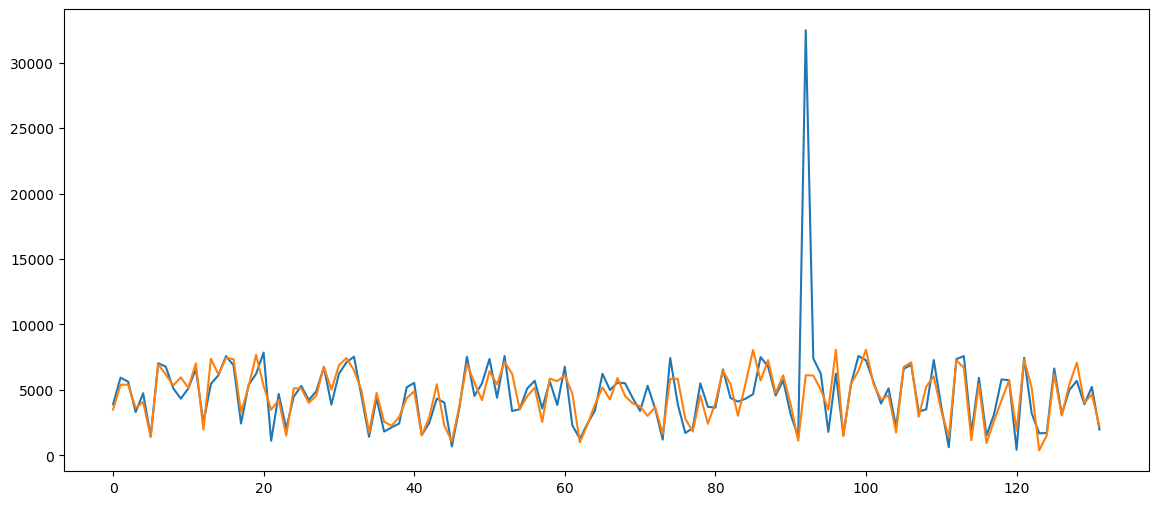

In [23]:
# Visualize the output
plt.figure(figsize=(14,6))
plt.plot(test_labels)
plt.plot(baseline_pred)

In [24]:
print(f"Predict label for following example:\n{test_features.iloc[0,:]}")

#Predict a single value
predicted_value = baseline_model.predict([test_features.iloc[0,:]])[0]

print("\nPredicted label: ",predicted_value)
print("Actual label:", test_labels.iloc[0])
print("Deviation predicted from actual value: ",predicted_value - test_labels.iloc[0])

Predict label for following example:
instant            299.000000
season               4.000000
yr                   0.000000
mnth                10.000000
holiday              0.000000
weekday              2.000000
workingday           1.000000
weathersit           2.000000
atemp                0.472846
windspeed            0.120161
leaflets           605.000000
price reduction      0.000000
Name: 0, dtype: float64

Predicted label:  [3497.67758864]
Actual label: cnt    3894
Name: 0, dtype: int64
Deviation predicted from actual value:  cnt   -396.322411
Name: 0, dtype: float64


In [25]:
print(round(baseline_pred[:10] - test_labels.iloc[0:10])*100000, 2)

           cnt
0  -39600000.0
1  -53700000.0
2  -23200000.0
3   30800000.0
4  -66400000.0
5   -5100000.0
6   -7600000.0
7  -59300000.0
8   22600000.0
9  162500000.0 2


### 1.4. Evaluate Baseline model

In [26]:
# Evaluate model

#Return Mean Absolute Error -> Loss: The beste Value is 0.0
mae = mean_absolute_error(test_labels, baseline_pred)
print('MAE: %.3f' % mae)

#Return the coefficient of determination R^2 of the prediction -> Score: best possible value is 1.0
print("R^2 value of the model: ",baseline_model.score(test_features, test_labels))

MAE: 937.175
R^2 value of the model:  0.35340566790531613
